In [7]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
from wordcloud import WordCloud
from matplotlib.ticker import MaxNLocator


In [3]:
df = pd.read_csv('/Users/darianaumenko/Downloads/habr.csv')
df

,id,text,keywords,hubs,username,reading_time,title,time,status
0,390007,12 марта 2014 года на Kickstarter стартовала к...,"['даджет', 'даджеты', 'kickstarter', 'bluetoot...","['Блог компании Даджет', 'Гаджеты']",RubyFOX,6.0,Удачный проект с площадки Kickstarter – лампа ...,2016-02-16 06:44:56,ok
1,390011,Автопроизводитель Porscheобъявил об окончании ...,"['Porsche', 'Mission E']","['Энергия и элементы питания', 'Транспорт', 'Э...",SLY_G,1.0,Porsche построила первую электросолнечную коло...,2016-02-05 19:04:20,ok
2,390013,Медики из Бостонского детского госпиталясмогли...,"['данио-рерио', 'рак', 'раковая опухоль', 'пол...",['Научно-популярное'],SLY_G,2.0,С чего начинается рак: медики проследили разви...,2016-02-05 20:04:21,ok
3,390017,Вышедшие кнедавнему 15-летию Википедиистатьи б...,"['википедия', 'нетривиальные бизнесы', 'свобод...","['Научно-популярное', 'Краудсорсинг', 'Социаль...",ssneg,2.0,"5 фактов о Википедии, которых вы не знали. Тре...",2016-02-05 08:18:09,ok
4,390019,Генетики из исследовательской компании 23andMe...,"['совы', 'жаворонки', 'распорядок дня', 'цирка...","['Научно-популярное', 'Здоровье']",SLY_G,2.0,"Учёные нашли гены, заставляющие нас делиться н...",2016-02-05 21:42:36,ok
...,...,...,...,...,...,...,...,...,...
151899,789998,Разработчик бесплатного проекта Nitter с откры...,"['twitter', 'nitter', 'front-end', 'open sourc...","['Open source', 'Управление проектами', 'Социа...",maybe_elf,1.0,Автор Nitter объявил о закрытии проекта из-за ...,2024-01-30 06:57:47,ok
151900,790000,Авторы коллективного иска против образовательн...,"['geekbrains', 'образовательные курсы', 'иски'...","['Учебный процесс в IT', 'Законодательство в IT']",maybe_elf,2.0,Клиенты платформы GeekBrains добились возврата...,2024-01-30 07:17:01,ok
151901,790002,Нарастание угроз утечки информации требует при...,"['dlp-системы', 'информационная безопасность',...",['Информационная безопасность'],Golub,17.0,20 DLP-систем для информационной защиты компан...,2024-01-30 07:10:09,ok
151902,790004,"Глава Neuralink Илон Маскзаявил, что компания ...","['neuralink', 'нейроинтерфейс', 'мозг', 'мозг-...","['Биотехнологии', 'Мозг', 'Здоровье', 'Будущее...",maybe_elf,1.0,Neuralink впервые вживила нейрочип в мозг чело...,2024-01-30 07:27:07,ok


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151904 entries, 0 to 151903
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            151904 non-null  int64  
 1   text          151554 non-null  object 
 2   keywords      151904 non-null  object 
 3   hubs          151904 non-null  object 
 4   username      151471 non-null  object 
 5   reading_time  151900 non-null  float64
 6   title         151904 non-null  object 
 7   time          151904 non-null  object 
 8   status        151904 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


In [5]:
df.describe()

,id,reading_time
count,151904.000000,151900.000000
mean,586012.272922,5.951501
std,121306.958639,5.718022
min,390007.000000,1.000000
25%,479351.500000,2.000000
50%,569145.000000,4.000000
75%,700105.000000,8.000000
max,790006.000000,127.000000


In [6]:
df['status'].nunique()

1

In [7]:
df['username'].nunique()

24906

In [8]:
import ast

df['keywords'] = df['keywords'].apply(ast.literal_eval)
df['hubs'] = df['hubs'].apply(ast.literal_eval)

all_keywords = [kw.lower() for sublist in df['keywords'] for kw in sublist]
unique_keywords = set(all_keywords)
print(f"кол-во уникальных keywords: {len(unique_keywords)}")

all_hubs = [hub.lower() for sublist in df['hubs'] for hub in sublist]
unique_hubs = set(all_hubs)
print(f"кол-во уникальных hubs: {len(unique_hubs)}")

кол-во уникальных keywords: 125055
кол-во уникальных hubs: 1417


In [9]:
df['keywords'] = df['keywords'].apply(lambda lst: [x.lower() for x in lst])
df['hubs'] = df['hubs'].apply(lambda lst: [x.lower() for x in lst])

In [10]:
has_missing = df.isnull().values.any()
print('эесть пропуски -', has_missing)


missing_per_column = df.isnull().sum()
print("кол-во пропусков по столбцам")
print(missing_per_column)

missing_percent = (missing_per_column / len(df)) * 100
print("процент пропусков по столбцам")
print(missing_percent)

эесть пропуски - True
кол-во пропусков по столбцам
id                0
text            350
keywords          0
hubs              0
username        433
reading_time      4
title             0
time              0
status            0
dtype: int64
процент пропусков по столбцам
id              0.000000
text            0.230409
keywords        0.000000
hubs            0.000000
username        0.285048
reading_time    0.002633
title           0.000000
time            0.000000
status          0.000000
dtype: float64


In [11]:
df[df.isnull().any(axis=1)]

,id,text,keywords,hubs,username,reading_time,title,time,status
562,391269,NaN,"[honor 5x, huawei, android, emui]","[блог компании huawei, гаджеты]",NaN,4.0,Обзор смартфона Honor 5X / Хабр,2016-03-04 13:40:27,ok
772,391751,NaN,"[sony, rss, news feed, news suite]","[блог компании sony, лайфхаки для гиков]",NaN,3.0,Обзор приложения Sony News Suite / Хабр,2016-03-17 15:19:23,ok
937,392135,NaN,"[honor 5x, huawei, android, emui]","[блог компании huawei, гаджеты]",NaN,4.0,Honor в деталях. Просто о неочевидном / Хабр,2016-04-11 13:00:20,ok
1525,393441,NaN,"[sococo, виртуальный офис, совместная работа, ...","[блог компании rcntec, офисы it-компаний]",NaN,8.0,"Наш офис не дом и не улица, наш офис теперь — ...",2016-04-29 14:40:55,ok
2628,395877,NaN,"[материнская плата, axiomtek, железо, pico]","[блог компании amlogo, компьютерное железо]",NaN,7.0,PICO100 от Axiomtek: сила простоты / Хабр,2016-07-11 13:22:01,ok
...,...,...,...,...,...,...,...,...,...
149440,783706,В поисках Деда Мороза Хабраслизень решил взобр...,"[игры, видеоигры, квиз, развлечения, интеракти...","[блог компании madrobots, занимательные задачк...",NaN,1.0,Ищем Деда Мороза на вершине Башни Игр — и помо...,2023-12-28 10:11:05,ok
149463,783768,"Привет, Хабр! На связи Иван Крылов (@Alaunquir...","[обзор техники, ноутбук, железо, разборка, про...","[блог компании osio, гаджеты, компьютерное жел...",NaN,9.0,На 50 оттенков красного меньше: обзор OSIO Foc...,2023-12-29 16:02:22,ok
149546,783960,Уже пятый день Хабраслизень безуспешно ищет Де...,"[бинго, интерактив, новый год, баланс, развлеч...","[занимательные задачки, карьера в it-индустрии...",NaN,1.0,"Раз-два-три, ёлочка, не выгори! Бинго по итога...",2023-12-29 09:16:14,ok
149582,784050,"Слизень отдохнул от поисков Деда Мороза, запол...","[e-commerce, kafka, paas, интерактив, развлече...","[блог компании купер, занимательные задачки, р...",NaN,3.0,Новогоднее загляденье: разглядываем праздничны...,2023-12-30 13:57:06,ok


In [12]:
df.dropna(subset=['text'], inplace=True)

# **Смотрим на хабы**

/var/folders/t_/r0bhz0ws3njcd5mnj0tth2yr0000gn/T/ipykernel_36959/3895755582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='tag', x='count', data=hubs_counts_df_popular.head(20), palette='viridis')


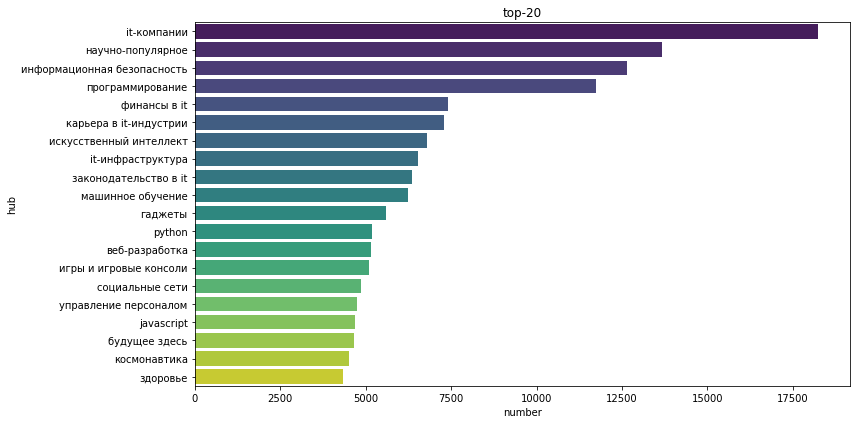

In [13]:
all_hubs = [hub.lower() for sublist in df['hubs'] for hub in sublist]
hubs_counts = Counter(all_hubs)
hubs_counts_df_popular = pd.DataFrame(hubs_counts.items(), columns=['tag', 'count']).sort_values('count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(y='tag', x='count', data=hubs_counts_df_popular.head(20), palette='viridis')
plt.title("top-20")
plt.xlabel("number")
plt.ylabel("hub")
plt.tight_layout()
plt.show()

/var/folders/t_/r0bhz0ws3njcd5mnj0tth2yr0000gn/T/ipykernel_36959/406071363.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='tag', x='count', data=hubs_counts_df.head(20), palette='viridis')


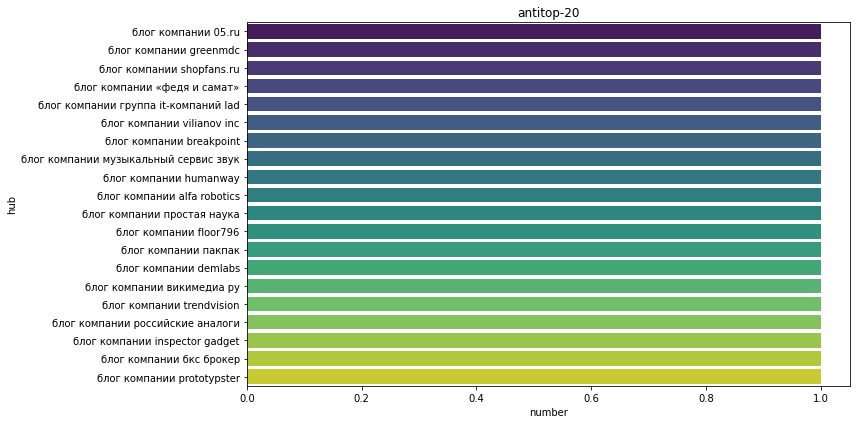

In [14]:
all_hubs = [hub.lower() for sublist in df['hubs'] for hub in sublist]
hubs_counts = Counter(all_hubs)
hubs_counts_df = pd.DataFrame(hubs_counts.items(), columns=['tag', 'count']).sort_values('count', ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(y='tag', x='count', data=hubs_counts_df.head(20), palette='viridis')
plt.title("antitop-20")
plt.xlabel("number")
plt.ylabel("hub")
plt.tight_layout()
plt.show()

In [15]:
hubs_counts_df.reset_index(drop= True, inplace = True) # количество каждого хаба
hubs_counts_df

,tag,count
0,блог компании 05.ru,1
1,блог компании greenmdc,1
2,блог компании shopfans.ru,1
3,блог компании «федя и самат»,1
4,блог компании группа it-компаний lad,1
...,...,...
1401,финансы в it,7404
1402,программирование,11747
1403,информационная безопасность,12649
1404,научно-популярное,13672


In [16]:
hubs_counts_df[hubs_counts_df['count'] == 1]

,tag,count
0,блог компании 05.ru,1
1,блог компании greenmdc,1
2,блог компании shopfans.ru,1
3,блог компании «федя и самат»,1
4,блог компании группа it-компаний lad,1
...,...,...
93,блог компании appevent,1
94,блог компании силовые машины,1
95,блог компании аналитикум плюс,1
96,блог компании osio,1


In [17]:
hubs_lengths = df['hubs'].apply(len)
mean_hubs_words = hubs_lengths.mean()

print(f"mean number of 'hubs' for one text: {mean_hubs_words:.2f}")

mean number of 'hubs' for one text: 3.13


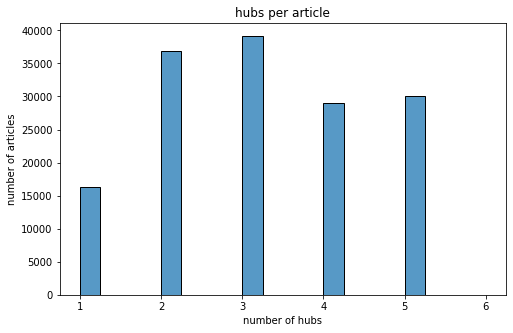

In [18]:
df['num_hubs'] = df['hubs'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['num_hubs'], bins=20, kde=False)
plt.title("hubs per article")
plt.xlabel("number of hubs")
plt.ylabel("number of articles")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=20))

plt.show()

In [19]:
df['num_hubs'].describe()

count    151554.000000
mean          3.128627
std           1.281839
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: num_hubs, dtype: float64

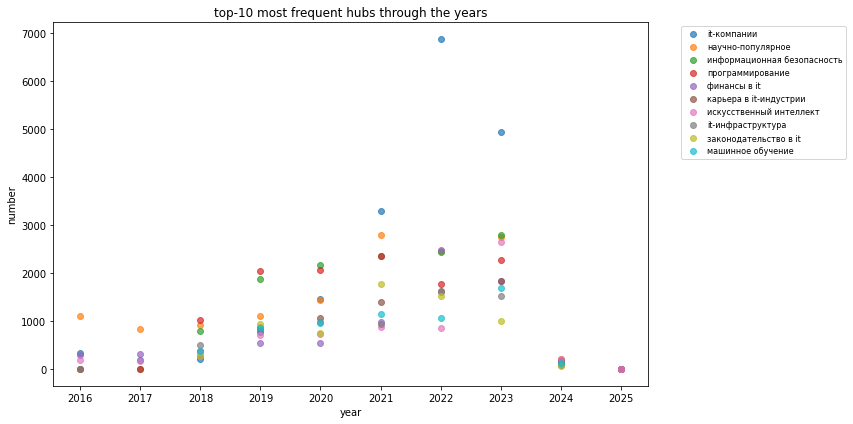

In [20]:
df_exploded = df.explode("hubs").copy()
df_exploded["year"] = pd.to_datetime(df_exploded["time"]).dt.year

tag_trend_year = (
    df_exploded
    .groupby(["year", "hubs"])
    .size()
    .reset_index(name="count")
)

top_tags = (
    tag_trend_year.groupby("hubs")["count"]
    .sum()
    .nlargest(10)
    .index
)

tag_trend_top = tag_trend_year[tag_trend_year["hubs"].isin(top_tags)]

plt.figure(figsize=(12, 6))
for tag in top_tags:
    subset = tag_trend_top[tag_trend_top["hubs"] == tag]
    plt.scatter(subset["year"], subset["count"], label=tag, alpha=0.7)

plt.title("top-10 most frequent hubs through the years")
plt.xlabel("year")
plt.ylabel("number")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=19))
plt.show()

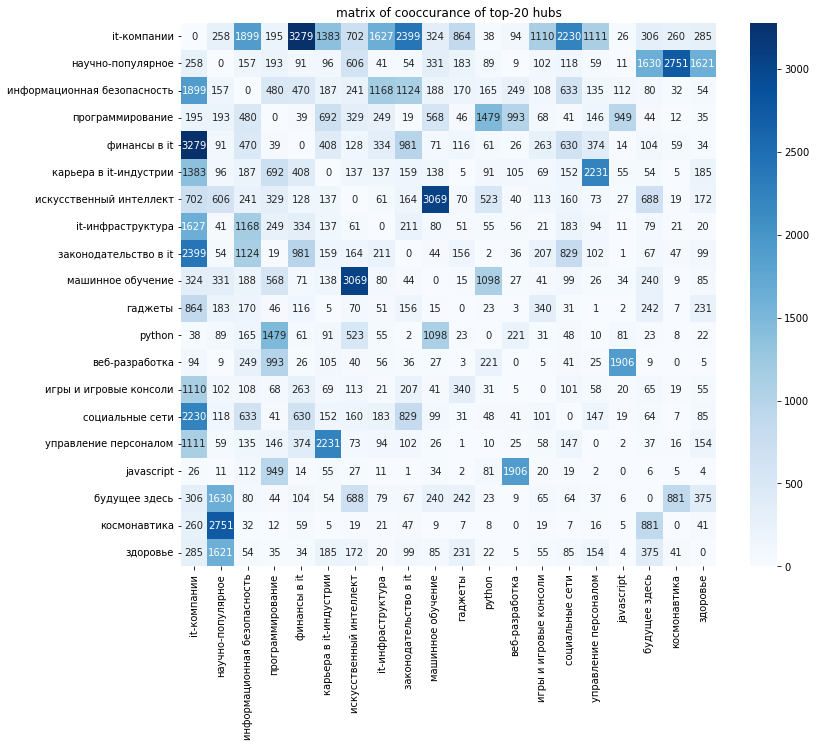

In [21]:
hubs_list = list(hubs_counts_df_popular['tag'].head(20))
co_matrix = pd.DataFrame(0, index=hubs_list, columns=hubs_list)
for t in df['hubs']:
    for a,b in combinations(t,2):
        if a in hubs_list and b in hubs_list:
            co_matrix.loc[a,b] += 1
            co_matrix.loc[b,a] += 1

plt.figure(figsize=(12,10))
sns.heatmap(co_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("matrix of cooccurance of top-20 hubs")
plt.show()

# **Смотрим на киворды**

In [22]:
keywords_lengths = df['keywords'].apply(len)
mean_keywords_words = keywords_lengths.mean()

print(f"mean number of 'keywords' for one text: {mean_keywords_words:.2f}")

mean number of 'keywords' for one text: 5.46


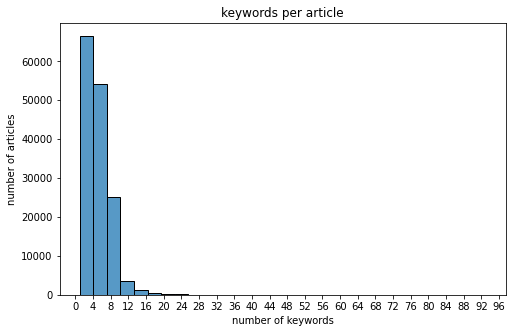

In [23]:
df['num_keywords'] = df['keywords'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['num_keywords'], bins=30, kde=False)
plt.title("keywords per article")
plt.xlabel("number of keywords")
plt.ylabel("number of articles")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=30))

plt.show()

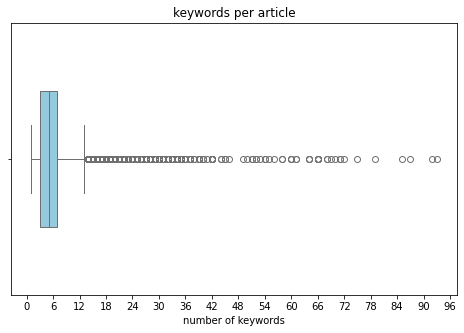

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['num_keywords'], color='skyblue', width=0.5)
plt.title("keywords per article")
plt.xlabel("number of keywords")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=20))
plt.show()

In [25]:
df['num_keywords'].describe()

count    151554.000000
mean          5.456774
std           3.098345
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          93.000000
Name: num_keywords, dtype: float64

# **Смотрим дату**

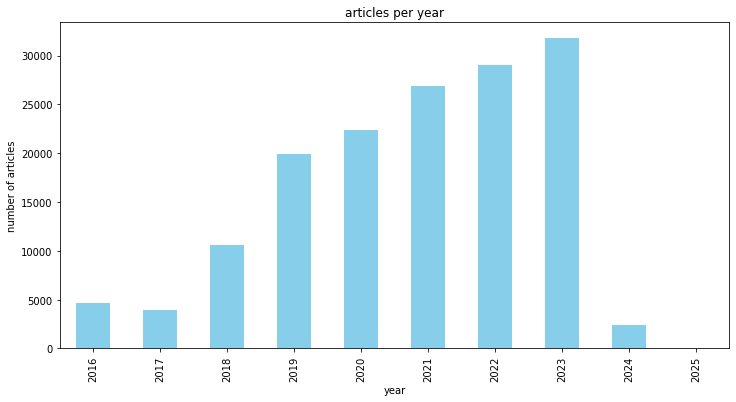

In [26]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

plt.figure(figsize=(12,6))
df.groupby('year').size().plot(kind='bar', color='skyblue')
plt.title("articles per year")
plt.xlabel("year")
plt.ylabel("number of articles")
plt.show()


In [27]:
df

,id,text,keywords,hubs,username,reading_time,title,time,status,num_hubs,num_keywords,year
0,390007,12 марта 2014 года на Kickstarter стартовала к...,"[даджет, даджеты, kickstarter, bluetooth, ламп...","[блог компании даджет, гаджеты]",RubyFOX,6.0,Удачный проект с площадки Kickstarter – лампа ...,2016-02-16 06:44:56,ok,2,7,2016
1,390011,Автопроизводитель Porscheобъявил об окончании ...,"[porsche, mission e]","[энергия и элементы питания, транспорт, экология]",SLY_G,1.0,Porsche построила первую электросолнечную коло...,2016-02-05 19:04:20,ok,3,2,2016
2,390013,Медики из Бостонского детского госпиталясмогли...,"[данио-рерио, рак, раковая опухоль, поля канце...",[научно-популярное],SLY_G,2.0,С чего начинается рак: медики проследили разви...,2016-02-05 20:04:21,ok,1,4,2016
3,390017,Вышедшие кнедавнему 15-летию Википедиистатьи б...,"[википедия, нетривиальные бизнесы, свободное з...","[научно-популярное, краудсорсинг, социальные с...",ssneg,2.0,"5 фактов о Википедии, которых вы не знали. Тре...",2016-02-05 08:18:09,ok,4,4,2016
4,390019,Генетики из исследовательской компании 23andMe...,"[совы, жаворонки, распорядок дня, циркадные ри...","[научно-популярное, здоровье]",SLY_G,2.0,"Учёные нашли гены, заставляющие нас делиться н...",2016-02-05 21:42:36,ok,2,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
151899,789998,Разработчик бесплатного проекта Nitter с откры...,"[twitter, nitter, front-end, open source, соцс...","[open source, управление проектами, социальные...",maybe_elf,1.0,Автор Nitter объявил о закрытии проекта из-за ...,2024-01-30 06:57:47,ok,3,9,2024
151900,790000,Авторы коллективного иска против образовательн...,"[geekbrains, образовательные курсы, иски, суды...","[учебный процесс в it, законодательство в it]",maybe_elf,2.0,Клиенты платформы GeekBrains добились возврата...,2024-01-30 07:17:01,ok,2,9,2024
151901,790002,Нарастание угроз утечки информации требует при...,"[dlp-системы, информационная безопасность, кон...",[информационная безопасность],Golub,17.0,20 DLP-систем для информационной защиты компан...,2024-01-30 07:10:09,ok,1,4,2024
151902,790004,"Глава Neuralink Илон Маскзаявил, что компания ...","[neuralink, нейроинтерфейс, мозг, мозг-компьют...","[биотехнологии, мозг, здоровье, будущее здесь]",maybe_elf,1.0,Neuralink впервые вживила нейрочип в мозг чело...,2024-01-30 07:27:07,ok,4,8,2024


# **Смотрим на текст**

In [28]:
df['text'] = df['text'].astype(str)

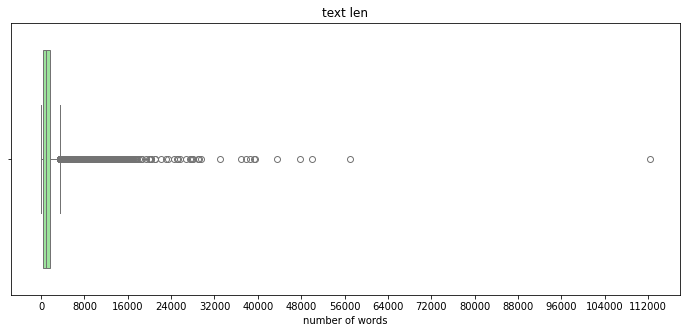

In [29]:
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,5))
sns.boxplot(x = df['text_len'], color='lightgreen')
plt.title("text len")
plt.xlabel("number of words")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=20))


plt.show()

In [30]:
df['text_len'].describe()

count    151554.00000
mean       1210.32203
std        1303.94495
min           1.00000
25%         370.00000
50%         883.00000
75%        1626.00000
max      112366.00000
Name: text_len, dtype: float64

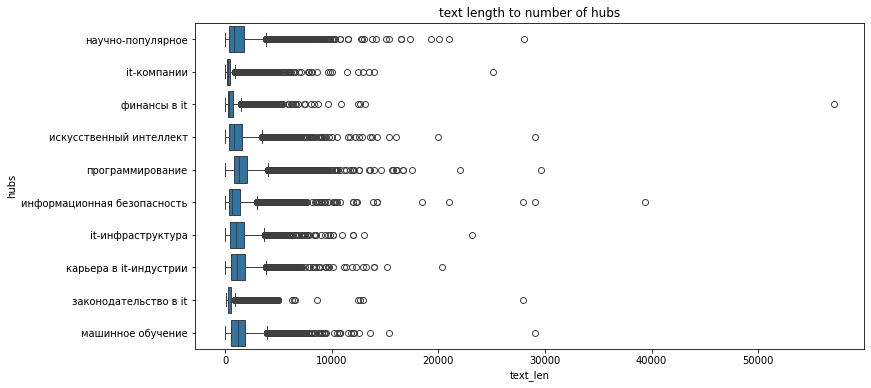

In [40]:
df_top = df[df['hubs'].apply(lambda x: any(h in top_tags for h in x))]
plt.figure(figsize=(12, 6))
df_top_exploded = df_top.explode('hubs')
sns.boxplot(data=df_top_exploded[df_top_exploded['hubs'].isin(top_tags)],
            y='hubs', x='text_len')
plt.title("text length to number of hubs")
# plt.xticks(rotation )
plt.show()

# **Смотрим на заголовок**

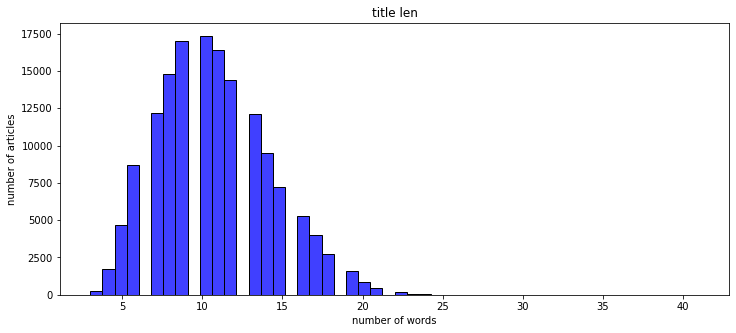

In [31]:
df['title_len'] = df['title'].apply(lambda x: len(str(x).split()))


plt.figure(figsize=(12,5))
sns.histplot(df['title_len'], bins=50, color='blue')
plt.title("title len")
plt.xlabel("number of words")
plt.ylabel("number of articles")

plt.show()

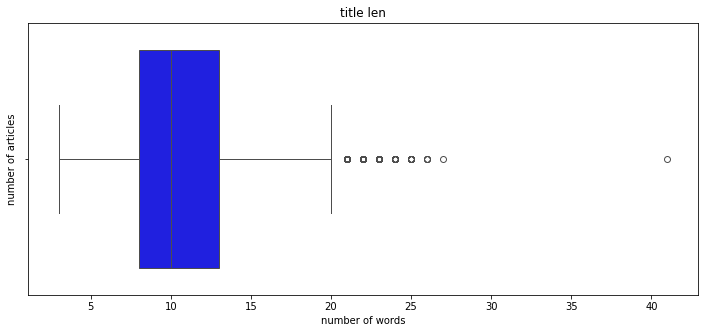

In [32]:
plt.figure(figsize=(12,5))
sns.boxplot(x = df['title_len'], color='blue')
plt.title("title len")
plt.xlabel("number of words")
plt.ylabel("number of articles")

plt.show()

In [33]:
df['title_len'].describe()

count    151554.000000
mean         10.759366
std           3.467851
min           3.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          41.000000
Name: title_len, dtype: float64

# **Смотрим на время чтения**

In [34]:
df['reading_time'].describe()

count    151553.000000
mean          5.940390
std           5.699201
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         127.000000
Name: reading_time, dtype: float64

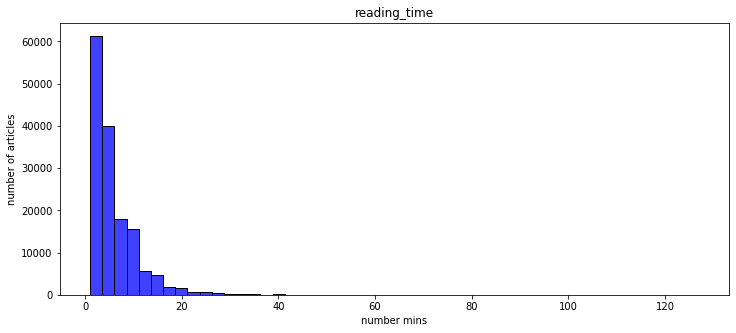

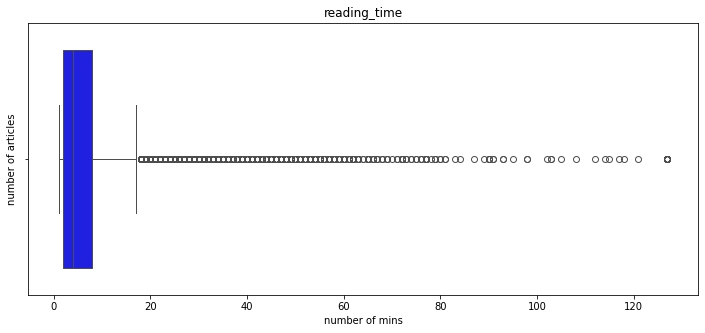

In [35]:
plt.figure(figsize=(12,5))
sns.histplot(df['reading_time'], bins=50, color='blue')
plt.title("reading_time")
plt.xlabel("number mins")
plt.ylabel("number of articles")

plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x = df['reading_time'], color='blue')
plt.title("reading_time")
plt.xlabel("number of mins")
plt.ylabel("number of articles")

plt.show()

<Axes: xlabel='year'>

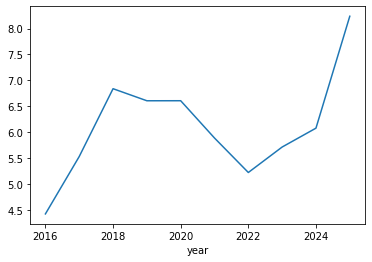

In [43]:
df.groupby('year')['reading_time'].mean().plot()

# **Общее**

In [49]:
corr_matrix = df[['reading_time', 'title_len', 'text_len', 'num_keywords', 'num_hubs']].corr()
corr_matrix

,reading_time,title_len,text_len,num_keywords,num_hubs
reading_time,1.000000,-0.110898,0.959353,0.089676,0.162706
title_len,-0.110898,1.000000,-0.104667,0.108286,0.080261
text_len,0.959353,-0.104667,1.000000,0.081003,0.155087
num_keywords,0.089676,0.108286,0.081003,1.000000,0.273473
num_hubs,0.162706,0.080261,0.155087,0.273473,1.000000


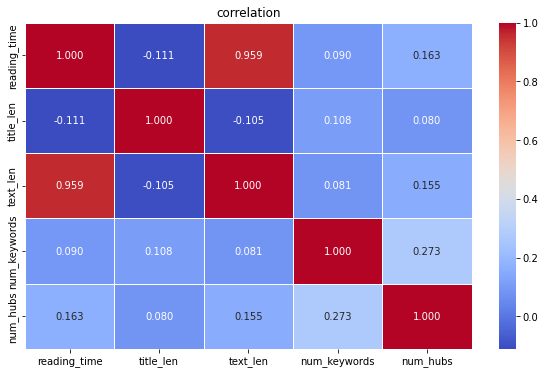

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)
plt.title("correlation")
plt.show()

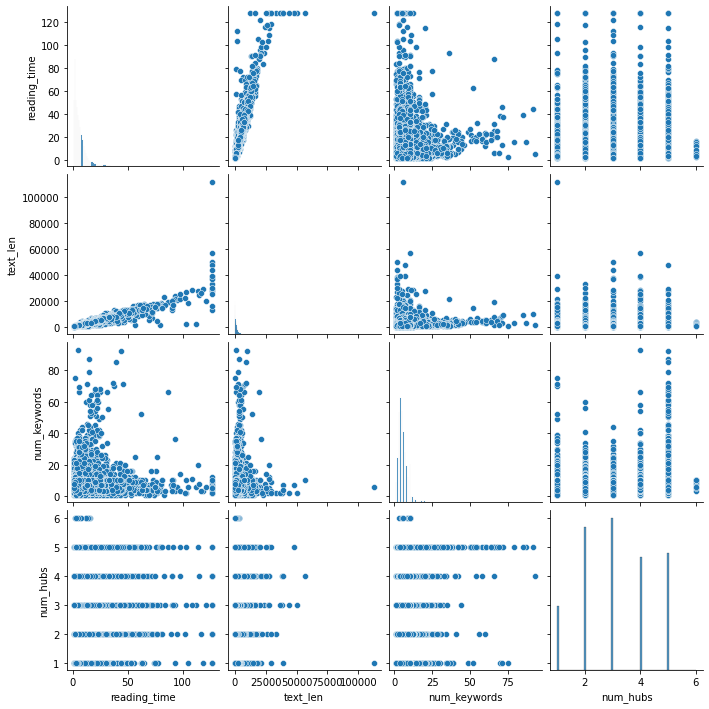

In [52]:
sns.pairplot(df[['reading_time', 'text_len', 'num_keywords', 'num_hubs']])
plt.show()

# **Обработка данных**

тут вообще можно было бы поработать с выбросами - например логарифмировать reading_time и text_len, но можно пока не делать, тк возможно эти переменные не будут использоваться + есть модели устойчивые к выбросам. В общем можно будет потом попробовать два варианта(обработанные/необработанные)